In [1]:
import sys
sys.path.append('../')

from src.nn.linear import Linear
from src.nn.functional import ReLU, Softmax, MSELoss
from src.optim.optim import SGD
from src.utils.template import BaseClass
from src.utils.dataset import MnistDataset
from src.utils.trainer import Trainer

import torch
from torch import nn
from torch.utils.data import DataLoader

import numpy as np

import random
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
training_images_filepath = "/home/tim/repos/hse-mlp-implementation/data/train-images.idx3-ubyte" #join(local_path, input_folder, 'train-images-idx3-ubyte')
training_labels_filepath = "/home/tim/repos/hse-mlp-implementation/data/train-labels.idx1-ubyte" #join(local_path, input_folder, 'train-labels-idx1-ubyte')
test_images_filepath = "/home/tim/repos/hse-mlp-implementation/data/t10k-images.idx3-ubyte" #join(local_path, input_folder, 't10k-images-idx3-ubyte')
test_labels_filepath = "/home/tim/repos/hse-mlp-implementation/data/t10k-labels.idx1-ubyte" #join(local_path, input_folder, 't10k-labels-idx1-ubyte')

mnist_train = MnistDataset(training_images_filepath, training_labels_filepath)
mnist_test = MnistDataset(test_images_filepath, test_labels_filepath)

In [3]:
class MLP(BaseClass):
    def __init__(self, input_size, output_size, hidden_size):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size
        
        self.layers = [
            Linear(input_size, hidden_size),
            ReLU(), 
            Linear(hidden_size, output_size),
            Softmax()
        ]

    def forward(self, x: np.ndarray) -> np.ndarray:
        assert len(self.layers) > 0
        for layer in self.layers:
            x = layer(x)
        return x

In [4]:
train_dataloader = DataLoader(mnist_train, batch_size=64, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=1)

In [5]:
input_shape = next(iter(train_dataloader))[0].shape[1]
model = MLP(input_size=input_shape, output_size=mnist_train.CLASSES, hidden_size=512)

In [6]:
optimizer = SGD(learning_rate=0.005)
criterion = MSELoss()

model=model, 
optimizer=optimizer, 
criterion=criterion, 
do_train=True,
do_eval=True,
epochs=3, 
batch_size=64

In [7]:
trainer_config = {
    "model": model, 
    "optimizer": optimizer, 
    "criterion": criterion, 
    "do_train": True,
    "do_eval": True,
    "epochs": 3, 
    "batch_size": 64,
    "eval_metric": "accuracy"
}

Input data has <class 'src.utils.dataset.MnistDataset'> format, creating train dataloader
Input data has <class 'src.utils.dataset.MnistDataset'> format, creating test dataloader


Epoch 0: 100%|██████████| 938/938 [00:06<00:00, 154.50it/s]


Train Loss: 0.04200688212030441
Eval loss: 0.03331596591343581
Eval metric: 0.7446


Epoch 1: 100%|██████████| 938/938 [00:06<00:00, 136.34it/s]


Train Loss: 0.028011753163149737
Eval loss: 0.024242908590569438
Eval metric: 0.8482


Epoch 2: 100%|██████████| 938/938 [00:05<00:00, 157.47it/s]


Train Loss: 0.023216940442317095
Eval loss: 0.023834658655533567
Eval metric: 0.8412


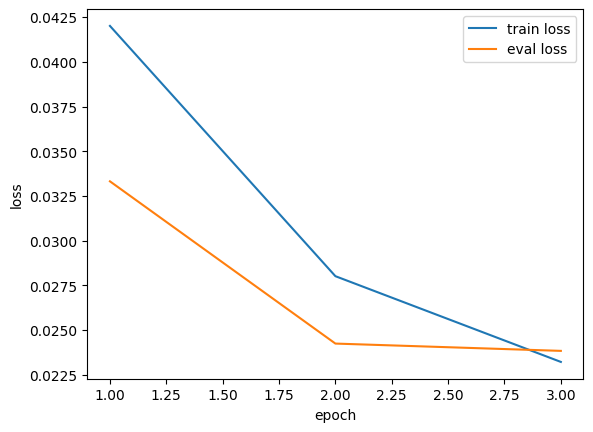

In [8]:
trainer = Trainer(**trainer_config)
trainer.train(train_data=mnist_train, eval_data=mnist_test)